# House Price Prediction in London

## Importing Dataset From Kaggle


In [2]:
import kagglehub

path = kagglehub.dataset_download("kanchana1990/real-estate-data-london-2024")

print("Path to dataset files:", path)


100%|██████████| 559k/559k [00:00<00:00, 992kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kanchana1990/real-estate-data-london-2024/versions/1


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

files = os.listdir(path)
print("Files in dataset directory:", files)

dataset_path = os.path.join(path, "realestate_data_london_2024_nov.csv")
dataset = pd.read_csv(dataset_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Files in dataset directory: ['realestate_data_london_2024_nov.csv']


## First Sight of Dataset

In [4]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addedOn              1011 non-null   object 
 1   title                1019 non-null   object 
 2   descriptionHtml      1019 non-null   object 
 3   propertyType         1019 non-null   object 
 4   sizeSqFeetMax        869 non-null    float64
 5   bedrooms             1003 non-null   float64
 6   bathrooms            984 non-null    float64
 7   listingUpdateReason  1019 non-null   object 
 8   price                1019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 71.8+ KB


,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"


In [5]:
dataset.isnull().sum()

,0
addedOn,8
title,0
descriptionHtml,0
propertyType,0
sizeSqFeetMax,150
bedrooms,16
bathrooms,35
listingUpdateReason,0
price,0


In [6]:
dataset['sizeSqFeetMax'] = dataset['sizeSqFeetMax'].fillna(dataset['sizeSqFeetMax'].mean())
dataset['bedrooms'] = dataset['bedrooms'].fillna(dataset['bedrooms'].mean())
dataset['bathrooms'] = dataset['bathrooms'].fillna(dataset['bathrooms'].mean())


dataset.isnull().sum()





,0
addedOn,8
title,0
descriptionHtml,0
propertyType,0
sizeSqFeetMax,0
bedrooms,0
bathrooms,0
listingUpdateReason,0
price,0


# Visualization of the Dataset

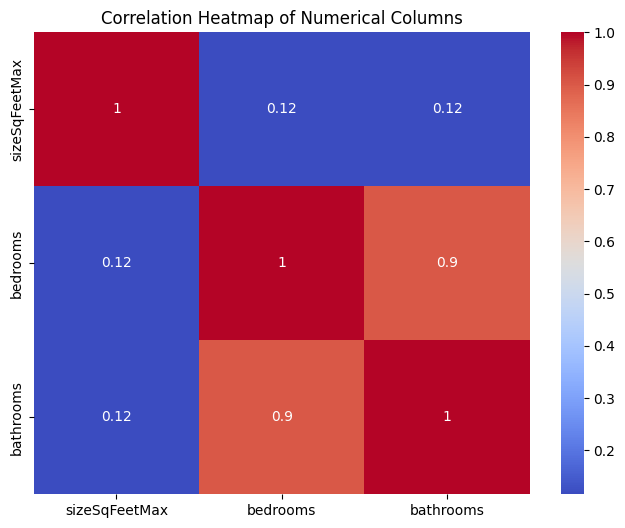

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[['sizeSqFeetMax', 'bedrooms', 'bathrooms']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


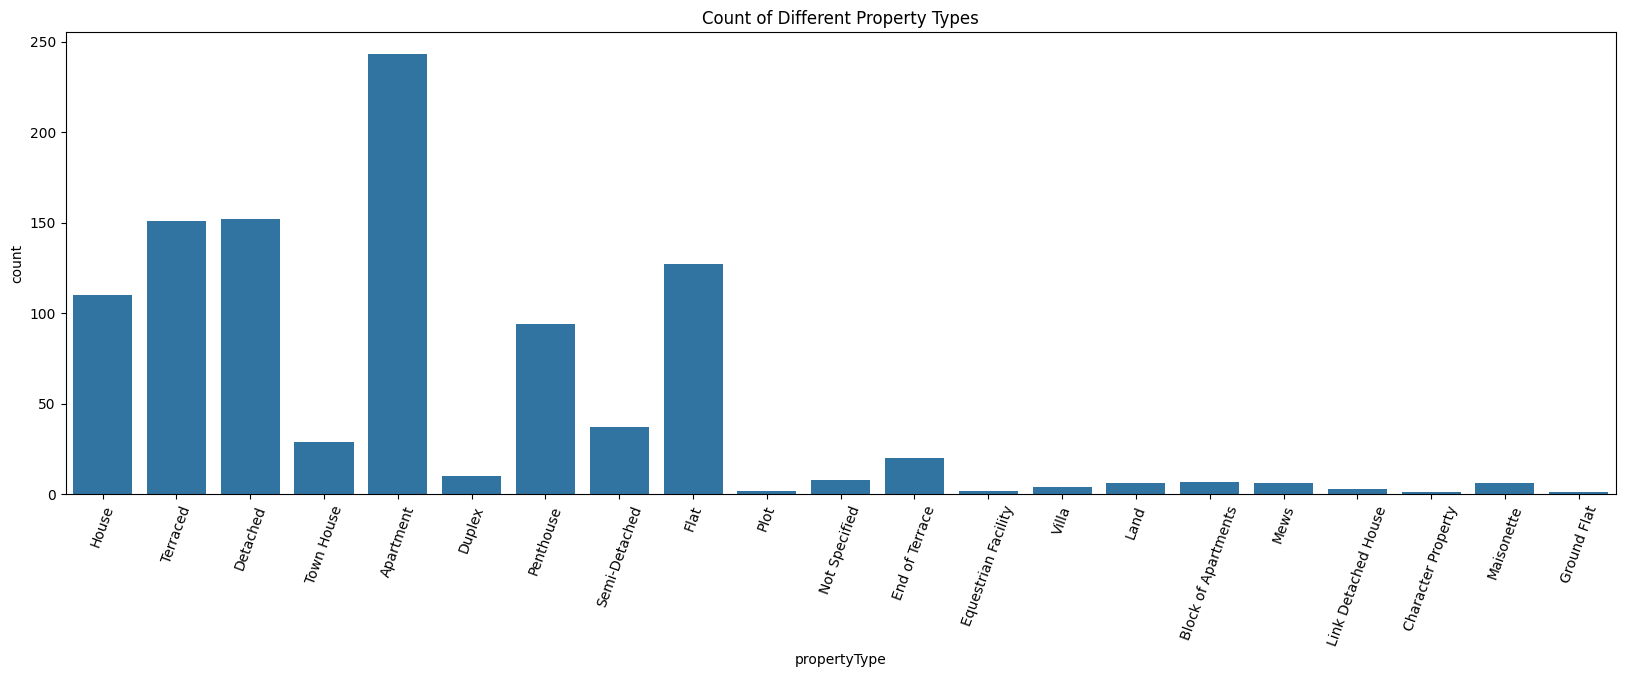

In [8]:
plt.figure(figsize=(20, 6))
sns.countplot(data=dataset, x='propertyType')
plt.title("Count of Different Property Types")
plt.xticks(rotation=70)
plt.show()


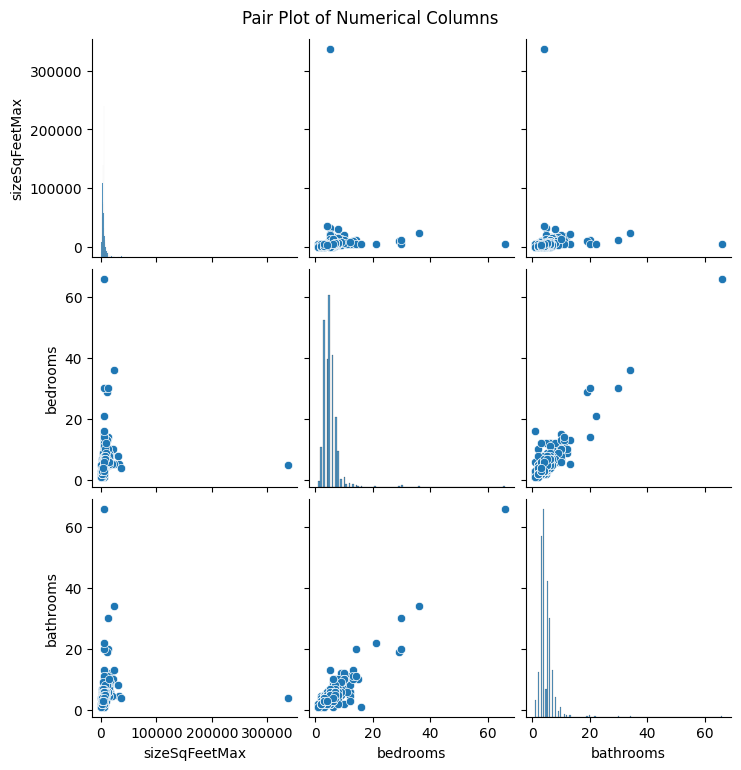

In [9]:
sns.pairplot(dataset[['sizeSqFeetMax', 'bedrooms', 'bathrooms']])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()


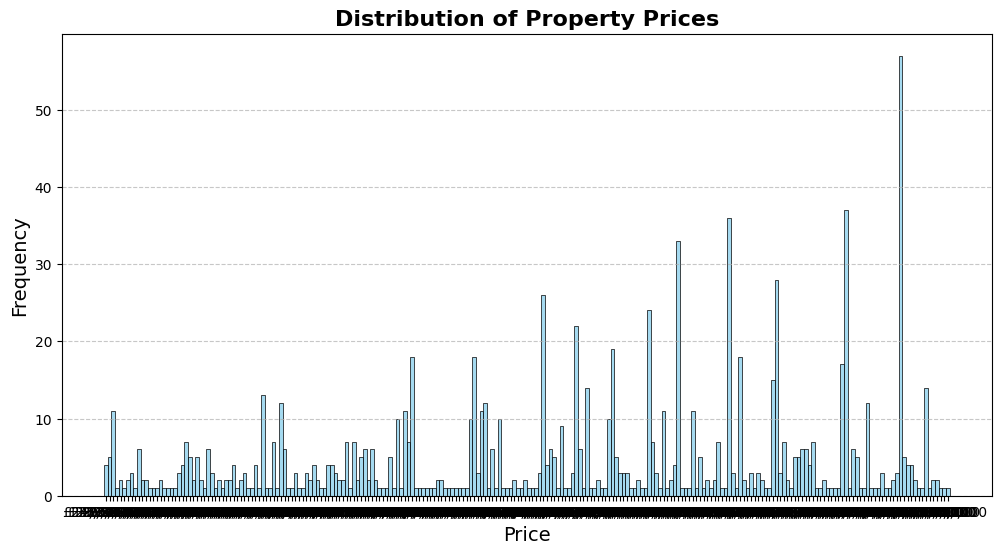

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['price'], bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
plt.title("Distribution of Property Prices", fontsize=16, fontweight='bold')
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Encoding Categorical Features

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(dataset[["propertyType", "listingUpdateReason"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["propertyType", "listingUpdateReason"]))
dataset = pd.concat([dataset, encoded_df], axis=1)


dataset.head()


,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,propertyType_Apartment,...,propertyType_Not Specified,propertyType_Penthouse,propertyType_Plot,propertyType_Semi-Detached,propertyType_Terraced,propertyType_Town House,propertyType_Villa,listingUpdateReason_new,listingUpdateReason_price_reduced,listingUpdateReason_size_change
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Scailing

In [12]:
dataset["price"] = dataset["price"].replace({"£": "", ",": "", "POA": None}, regex=True)

dataset["price"] = dataset["price"].astype(float)
dataset["price"] = dataset["price"].fillna(dataset["price"].mean())

from sklearn.preprocessing import StandardScaler

price_scaler = StandardScaler()

dataset['price'] = dataset['price'].fillna(dataset['price'].mean())  # Ensure no missing values
price_scaler.fit(dataset[['price']])


scaler = StandardScaler()
scaled_columns = ['sizeSqFeetMax', 'bedrooms', 'bathrooms'] + list(encoded_df.columns)
dataset[scaled_columns] = scaler.fit_transform(dataset[scaled_columns])


## Machine Learning

In [13]:
q1 = dataset['price'].quantile(0.25)
q3 = dataset['price'].quantile(0.75)
iqr = q3 - q1
dataset = dataset[(dataset['price'] >= (q1 - 1.5 * iqr)) & (dataset['price'] <= (q3 + 1.5 * iqr))]


### Spliting Dataset into Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split


X = dataset.drop(columns=['price', 'addedOn', 'title', 'descriptionHtml', 'propertyType', 'listingUpdateReason'])
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Models

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor()
}


## Modal Evaluating

In [16]:
for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_original = price_scaler.inverse_transform(y_pred.reshape(-1, 1))

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")


--- Random Forest ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 2059198.3367077583
Mean Squared Error: 8156918140366.045
Root Mean Squared Error: 2856031.8871409763
R-squared: 0.4333268345768251

--- Linear Regression ---
Mean Absolute Error: 2713429.128772239
Mean Squared Error: 12801159630676.562
Root Mean Squared Error: 3577870.823643101
R-squared: 0.11068451047648731

--- Gradient Boosting ---
Mean Absolute Error: 2177744.6895058746
Mean Squared Error: 8494097424457.689
Root Mean Squared Error: 2914463.488269786
R-squared: 0.4099024911001161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
